# A2C Agent 

In [64]:
import gym
from a2c import A2CAgent 
import time

# Create Gym environment
a2c_env = "CartPole-v1"
env = gym.make(a2c_env)

# Check agent class for initialization parameters and initialize agent
gamma = 0.90
lr = 1e-3

agent = A2CAgent(env, gamma, lr)

# Define training parameters
max_episodes = 500
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    trajectory = []
    state = env.reset()
    episode_reward = 0
    for step in range(max_steps):
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        trajectory.append((state, action, reward, next_state, done))
        episode_reward += reward  
        if done or step == max_steps:
            episode_rewards.append(episode_reward)
            print("Episode " + str(episode) + ": " + str(episode_reward))
            break
        state = next_state
    agent.update(trajectory, 0)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
a2c_rewards = episode_rewards
a2c_runtime = run_time

Episode 0: 17.0
Episode 1: 35.0
Episode 2: 22.0
Episode 3: 31.0
Episode 4: 18.0
Episode 5: 20.0
Episode 6: 52.0
Episode 7: 33.0
Episode 8: 52.0
Episode 9: 27.0
Episode 10: 16.0
Episode 11: 48.0
Episode 12: 18.0
Episode 13: 124.0
Episode 14: 71.0
Episode 15: 14.0
Episode 16: 27.0
Episode 17: 48.0
Episode 18: 20.0
Episode 19: 27.0
Episode 20: 47.0
Episode 21: 17.0
Episode 22: 13.0
Episode 23: 28.0
Episode 24: 58.0
Episode 25: 45.0
Episode 26: 70.0
Episode 27: 39.0
Episode 28: 24.0
Episode 29: 59.0
Episode 30: 59.0
Episode 31: 30.0
Episode 32: 43.0
Episode 33: 103.0
Episode 34: 70.0
Episode 35: 27.0
Episode 36: 30.0
Episode 37: 81.0
Episode 38: 81.0
Episode 39: 34.0
Episode 40: 32.0
Episode 41: 50.0
Episode 42: 34.0
Episode 43: 49.0
Episode 44: 26.0
Episode 45: 17.0
Episode 46: 45.0
Episode 47: 39.0
Episode 48: 72.0
Episode 49: 44.0
Episode 50: 38.0
Episode 51: 101.0
Episode 52: 69.0
Episode 53: 55.0
Episode 54: 40.0
Episode 55: 26.0
Episode 56: 47.0
Episode 57: 52.0
Episode 58: 25.0
Epis

Episode 446: 174.0
Episode 447: 153.0
Episode 448: 116.0
Episode 449: 182.0
Episode 450: 164.0
Episode 451: 197.0
Episode 452: 176.0
Episode 453: 219.0
Episode 454: 145.0
Episode 455: 159.0
Episode 456: 239.0
Episode 457: 140.0
Episode 458: 159.0
Episode 459: 215.0
Episode 460: 138.0
Episode 461: 184.0
Episode 462: 178.0
Episode 463: 182.0
Episode 464: 160.0
Episode 465: 168.0
Episode 466: 143.0
Episode 467: 154.0
Episode 468: 236.0
Episode 469: 200.0
Episode 470: 177.0
Episode 471: 58.0
Episode 472: 135.0
Episode 473: 237.0
Episode 474: 133.0
Episode 475: 186.0
Episode 476: 122.0
Episode 477: 148.0
Episode 478: 143.0
Episode 479: 201.0
Episode 480: 196.0
Episode 481: 152.0
Episode 482: 185.0
Episode 483: 213.0
Episode 484: 142.0
Episode 485: 188.0
Episode 486: 192.0
Episode 487: 275.0
Episode 488: 184.0
Episode 489: 153.0
Episode 490: 222.0
Episode 491: 204.0
Episode 492: 181.0
Episode 493: 209.0
Episode 494: 184.0
Episode 495: 197.0
Episode 496: 134.0
Episode 497: 171.0
Episode 498: 

# DR TRPO Agent (KL) 

In [75]:
import gym
from a2c_dr_trpo import DRTRPOAgent 
import time

# Create Gym environment
kl_env = "CartPole-v1"
env = gym.make(kl_env)

# Check agent class for initialization parameters and initialize agent
gamma = 0.90
lr = 1e-2

agent = DRTRPOAgent(env, gamma, lr)

############################### MC Updates  (Full Episode) ###############################

# Define training parameters
max_episodes = 500
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    first_state = env.reset()
    state_adv = []
    total_value_loss = 0
    
    episode_reward = 0
    # loop through the first action
    for i in range(env.action_space.n):
        env.reset()
        state = first_state
        action = i
        trajectory = []
        
        for step in range(max_steps):
            if step != 0:
                action = agent.get_action(state)
            next_state, reward, done, _ = env.step(action)
            trajectory.append((state, action, reward, next_state, done))
            episode_reward += reward  
            if done or step == max_steps-1:
                break
            state = next_state
            
        adv, value_loss = agent.compute_adv_mc(trajectory)
        state_adv.append(adv[0])
        total_value_loss += value_loss
    
    beta = 0.7 # for "CartPole-v1", 0.7 is an optimal value
    policy_loss = agent.compute_policy_loss_kl(state, state_adv, beta)
    agent.update(value_loss, policy_loss)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
    avg_episode_reward = episode_reward/env.action_space.n
    episode_rewards.append(avg_episode_reward)
    print("Episode " + str(episode) + ": " + str(avg_episode_reward))

dr_trpo_kl_rewards = episode_rewards
dr_trpo_kl_runtime = run_time

Episode 0: 20.0
Episode 1: 24.0
Episode 2: 26.0
Episode 3: 39.5
Episode 4: 40.0
Episode 5: 20.0
Episode 6: 46.0
Episode 7: 39.0
Episode 8: 48.5
Episode 9: 60.0
Episode 10: 60.0
Episode 11: 60.5
Episode 12: 52.5
Episode 13: 46.0
Episode 14: 122.0
Episode 15: 37.0
Episode 16: 45.0
Episode 17: 43.5
Episode 18: 66.0
Episode 19: 76.0
Episode 20: 77.5
Episode 21: 71.0
Episode 22: 36.0
Episode 23: 42.0
Episode 24: 47.5
Episode 25: 42.0
Episode 26: 37.5
Episode 27: 54.5
Episode 28: 55.0
Episode 29: 62.5
Episode 30: 42.0
Episode 31: 60.0
Episode 32: 159.0
Episode 33: 77.5
Episode 34: 116.0
Episode 35: 68.0
Episode 36: 76.5
Episode 37: 190.0
Episode 38: 77.0
Episode 39: 82.0
Episode 40: 61.5
Episode 41: 81.5
Episode 42: 94.5
Episode 43: 122.0
Episode 44: 94.0
Episode 45: 99.5
Episode 46: 178.5
Episode 47: 152.5
Episode 48: 222.0
Episode 49: 172.0
Episode 50: 87.5
Episode 51: 143.0
Episode 52: 112.5
Episode 53: 106.5
Episode 54: 95.0
Episode 55: 109.5
Episode 56: 85.5
Episode 57: 93.0
Episode 58:

Episode 441: 176.5
Episode 442: 302.5
Episode 443: 294.5
Episode 444: 182.5
Episode 445: 206.0
Episode 446: 400.0
Episode 447: 254.0
Episode 448: 287.0
Episode 449: 295.5
Episode 450: 410.0
Episode 451: 247.0
Episode 452: 347.0
Episode 453: 440.5
Episode 454: 279.0
Episode 455: 267.0
Episode 456: 198.0
Episode 457: 310.5
Episode 458: 331.5
Episode 459: 406.5
Episode 460: 285.5
Episode 461: 373.0
Episode 462: 275.5
Episode 463: 293.0
Episode 464: 322.0
Episode 465: 328.0
Episode 466: 309.0
Episode 467: 253.5
Episode 468: 214.5
Episode 469: 419.5
Episode 470: 351.5
Episode 471: 211.5
Episode 472: 324.5
Episode 473: 270.0
Episode 474: 309.5
Episode 475: 240.0
Episode 476: 175.0
Episode 477: 324.0
Episode 478: 284.5
Episode 479: 249.5
Episode 480: 214.0
Episode 481: 344.0
Episode 482: 364.5
Episode 483: 360.5
Episode 484: 261.5
Episode 485: 213.0
Episode 486: 323.5
Episode 487: 206.5
Episode 488: 298.0
Episode 489: 372.0
Episode 490: 312.5
Episode 491: 290.5
Episode 492: 209.5
Episode 493:

# DR TRPO Agent (Wasserstein)

In [110]:
import gym
from a2c_dr_trpo import DRTRPOAgent 
import time
import numpy as np

wass_env = "CartPole-v1"
# Create Gym environment
env = gym.make(wass_env)

# Check agent class for initialization parameters and initialize agent
gamma = 0.9
lr = 1e-2

agent = DRTRPOAgent(env, gamma, lr)

############################### MC Updates  (Full Episode) ###############################

# Define training parameters
max_episodes = 700
max_steps = 500
total_adv_diff = 0

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    first_state = env.reset()
    state_adv = []
    total_value_loss = 0
    
    episode_reward = 0
    # loop through the first action
    for i in range(env.action_space.n):
        env.reset()
        state = first_state
        action = i
        trajectory = []
        
        for step in range(max_steps):
            if step != 0:
                action = agent.get_action(state)
            next_state, reward, done, _ = env.step(action)
            trajectory.append((state, action, reward, next_state, done))
            episode_reward += reward  
            if done or step == max_steps-1:
                break
            state = next_state
            
        adv, value_loss = agent.compute_adv_mc(trajectory)
        state_adv.append(adv[0])
        total_value_loss += value_loss
    
    total_adv_diff += abs(state_adv[1] - state_adv[0])
    beta = total_adv_diff/episode
    policy_loss = agent.compute_policy_loss_wass(state, state_adv, beta)

    
    agent.update(value_loss, policy_loss)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
    avg_episode_reward = episode_reward/env.action_space.n
    episode_rewards.append(avg_episode_reward)
    print("Episode " + str(episode) + ": " + str(avg_episode_reward))

dr_trpo_wass_rewards = episode_rewards
dr_trpo_wass_runtime = run_time

Episode 0: 14.5
Episode 1: 18.0
Episode 2: 16.0
Episode 3: 18.5
Episode 4: 10.5
Episode 5: 13.0
Episode 6: 13.5
Episode 7: 13.0
Episode 8: 11.5
Episode 9: 13.0
Episode 10: 12.5
Episode 11: 16.0
Episode 12: 12.5
Episode 13: 24.5
Episode 14: 16.5
Episode 15: 13.5
Episode 16: 14.5
Episode 17: 17.5
Episode 18: 21.0
Episode 19: 28.0
Episode 20: 22.5
Episode 21: 23.0
Episode 22: 29.0
Episode 23: 18.0
Episode 24: 18.5
Episode 25: 55.5
Episode 26: 39.0
Episode 27: 33.0
Episode 28: 38.0
Episode 29: 31.5
Episode 30: 42.0
Episode 31: 38.0
Episode 32: 66.0
Episode 33: 32.5
Episode 34: 42.5
Episode 35: 32.0
Episode 36: 109.0
Episode 37: 36.0
Episode 38: 35.5
Episode 39: 71.5
Episode 40: 62.5
Episode 41: 38.0
Episode 42: 105.0
Episode 43: 68.5
Episode 44: 43.5
Episode 45: 151.0
Episode 46: 52.5
Episode 47: 53.5
Episode 48: 53.0
Episode 49: 51.0
Episode 50: 49.0
Episode 51: 54.0
Episode 52: 114.0
Episode 53: 59.5
Episode 54: 66.5
Episode 55: 61.0
Episode 56: 67.0
Episode 57: 59.5
Episode 58: 47.5
Epi

Episode 448: 326.0
Episode 449: 90.5
Episode 450: 297.5
Episode 451: 273.0
Episode 452: 199.5
Episode 453: 296.0
Episode 454: 158.5
Episode 455: 360.0
Episode 456: 342.5
Episode 457: 343.5
Episode 458: 301.0
Episode 459: 280.5
Episode 460: 207.0
Episode 461: 282.5
Episode 462: 215.0
Episode 463: 226.0
Episode 464: 225.0
Episode 465: 217.5
Episode 466: 342.5
Episode 467: 159.5
Episode 468: 243.5
Episode 469: 358.0
Episode 470: 196.5
Episode 471: 287.5
Episode 472: 287.5
Episode 473: 220.5
Episode 474: 430.0
Episode 475: 311.5
Episode 476: 336.0
Episode 477: 249.5
Episode 478: 159.0
Episode 479: 288.0
Episode 480: 246.5
Episode 481: 202.0
Episode 482: 221.5
Episode 483: 211.5
Episode 484: 421.5
Episode 485: 222.5
Episode 486: 317.5
Episode 487: 411.0
Episode 488: 283.5
Episode 489: 291.0
Episode 490: 424.0
Episode 491: 350.0
Episode 492: 286.0
Episode 493: 453.0
Episode 494: 274.0
Episode 495: 208.5
Episode 496: 352.0
Episode 497: 274.5
Episode 498: 230.0
Episode 499: 352.0
Episode 500: 

# Graph

In [57]:
import matplotlib.pyplot as plt
import time
import numpy as np

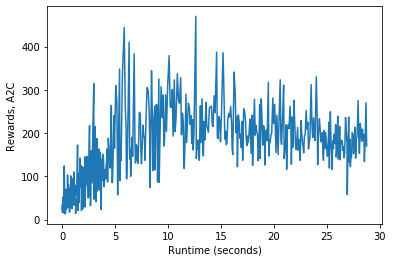

In [65]:
plt.plot(a2c_runtime, a2c_rewards)
plt.ylabel('Rewards, A2C')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/a2c/' + a2c_env + '-' + str(time.time()) + '.csv' 
out = np.column_stack((a2c_runtime, a2c_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')

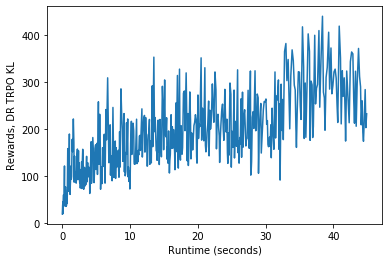

In [76]:
plt.plot(dr_trpo_kl_runtime, dr_trpo_kl_rewards)
plt.ylabel('Rewards, DR TRPO KL')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/dr_trpo_kl/' + kl_env + '-' + str(time.time()) + '.csv' 
out = np.column_stack((dr_trpo_kl_runtime, dr_trpo_kl_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')

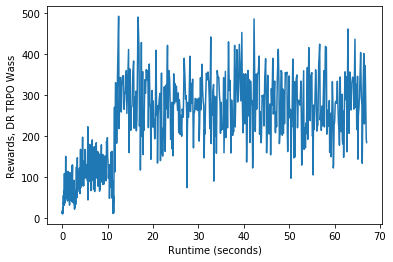

In [111]:
plt.plot(dr_trpo_wass_runtime, dr_trpo_wass_rewards)
plt.ylabel('Rewards, DR TRPO Wass')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/dr_trpo_wass/' + wass_env + '-' + str(time.time()) + '.csv' 
out = np.column_stack((dr_trpo_wass_runtime, dr_trpo_wass_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')